In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap Example

This notebook demonstrates how to create heatmaps using Seaborn's `heatmap` function. Heatmaps are useful for visualizing matrix data, such as correlation matrices, where color intensity represents the value of each cell.

In [2]:
# Load the tips dataset from seaborn
df = sns.load_dataset("tips")

# Display the first few rows of the dataset to understand its structure
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Creating a Correlation Matrix

Before creating a heatmap, we need to prepare the data. A common use case for heatmaps is to visualize correlation matrices. Let's create a correlation matrix for the numerical columns in our dataset.

In [3]:
# Create a correlation matrix for the numerical columns
corr = df.corr(numeric_only=True)

# Display the correlation matrix
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Creating a Basic Heatmap

The `heatmap` function in Seaborn creates a heatmap with the following key parameters:

- `data`: The matrix data to plot (e.g., a correlation matrix)
- `annot`: Whether to annotate cells with the numeric value (True/False)
- `cmap`: The colormap to use
- `vmin`, `vmax`: The minimum and maximum values for the colormap
- `center`: The value at which to center the colormap

Below, we'll create a heatmap of the correlation matrix.

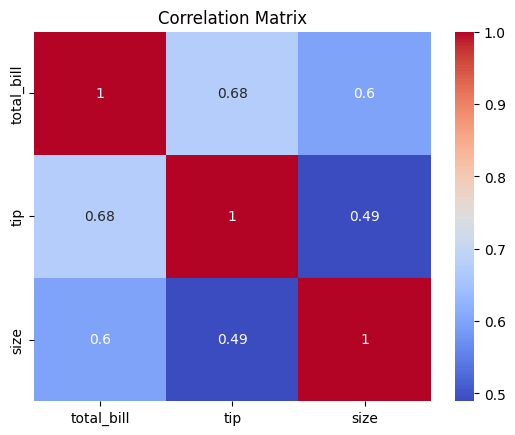

In [4]:
# Create a basic heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Colormap Options

Seaborn's heatmap function supports various colormaps. For correlation matrices, diverging colormaps like 'coolwarm', 'RdBu', or 'vlag' are often used, where positive correlations are shown in one color and negative correlations in another.

Let's compare different colormaps for our correlation matrix.

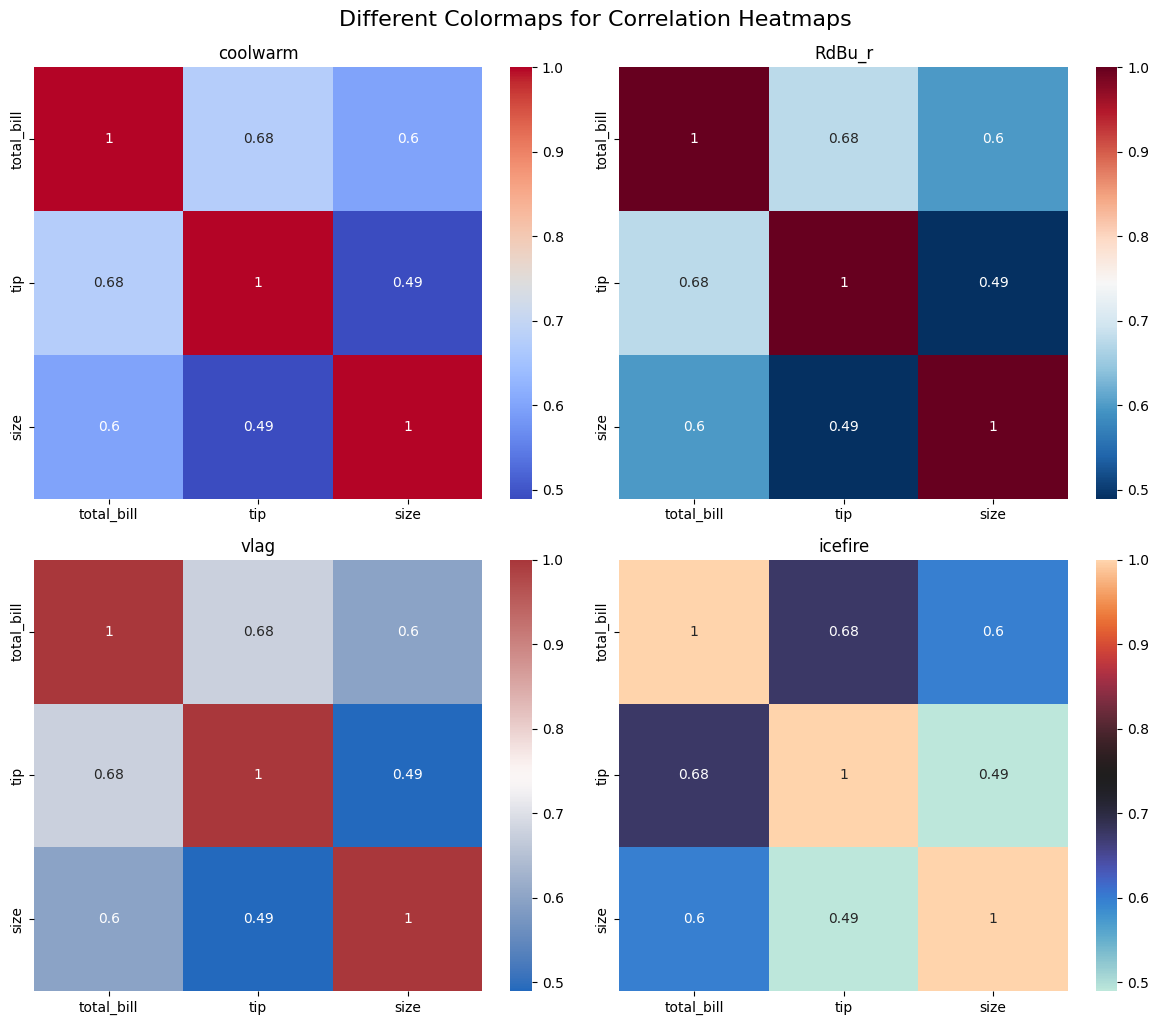

In [5]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Heatmap with coolwarm colormap
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("coolwarm")

# Heatmap with RdBu_r colormap
sns.heatmap(corr, annot=True, cmap="RdBu_r", ax=axes[0, 1])
axes[0, 1].set_title("RdBu_r")

# Heatmap with vlag colormap
sns.heatmap(corr, annot=True, cmap="vlag", ax=axes[1, 0])
axes[1, 0].set_title("vlag")

# Heatmap with icefire colormap
sns.heatmap(corr, annot=True, cmap="icefire", ax=axes[1, 1])
axes[1, 1].set_title("icefire")

plt.tight_layout()
plt.suptitle("Different Colormaps for Correlation Heatmaps", y=1.02, fontsize=16)
plt.show()

## Additional Customization Options

Seaborn's heatmap function offers many customization options:

- `annot_kws`: Keyword arguments for the annotations (e.g., font size)
- `linewidths`: Width of the lines that divide each cell
- `linecolor`: Color of the lines that divide each cell
- `cbar`: Whether to draw a colorbar (True/False)
- `cbar_kws`: Keyword arguments for the colorbar
- `square`: Whether to make the cells square (True/False)
- `mask`: Boolean array or DataFrame for showing only a subset of cells

Let's create a more customized heatmap.

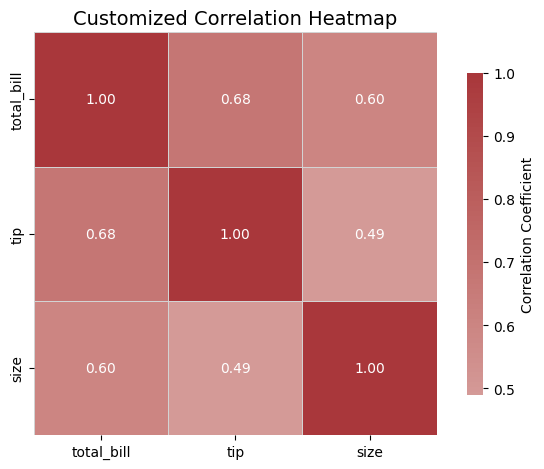

In [6]:
# Create a customized heatmap
sns.heatmap(
    corr, 
    annot=True,  # Show values in cells
    fmt=".2f",  # Format annotations to 2 decimal places
    cmap="vlag",  # Use the vlag colormap
    center=0,  # Center the colormap at 0
    square=True,  # Make cells square
    linewidths=0.5,  # Add lines between cells
    linecolor="lightgray",  # Color of the lines
    annot_kws={"size": 10},  # Font size for annotations
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Customize colorbar
)

plt.title("Customized Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

## Masking the Upper Triangle

For correlation matrices, it's common to mask the upper triangle since the matrix is symmetric. This makes the visualization cleaner and easier to read.

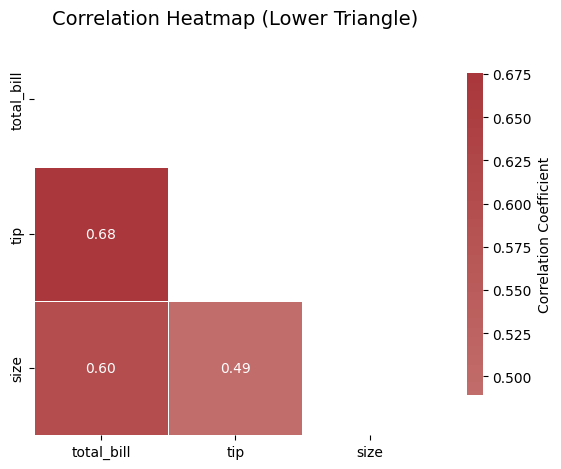

In [7]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap with the upper triangle masked
sns.heatmap(
    corr, 
    mask=mask,  # Apply the mask
    annot=True,  # Show values in cells
    fmt=".2f",  # Format annotations to 2 decimal places
    cmap="vlag",  # Use the vlag colormap
    center=0,  # Center the colormap at 0
    square=True,  # Make cells square
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Customize colorbar
)

plt.title("Correlation Heatmap (Lower Triangle)", fontsize=14)
plt.tight_layout()
plt.show()

## Other Examples of Heatmaps

Heatmaps can be used for various types of data, not just correlation matrices. Let's explore some other examples.

### Pivot Table Heatmap

We can create a heatmap from a pivot table to visualize the relationship between two categorical variables and a continuous variable.

In [13]:
# Create a pivot table of average tip by day and time
tips_pivot = pd.pivot_table(
    df,
    values="tip",
    index="day",
    columns="time",
    aggfunc="mean",
    observed=False  # Explicitly set to silence FutureWarning
)

# Display the pivot table
tips_pivot

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


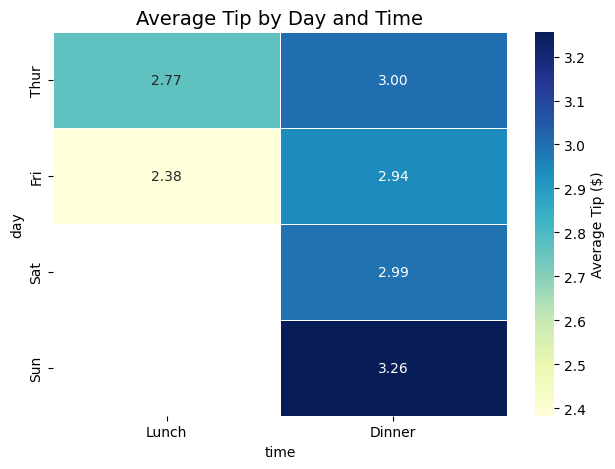

In [9]:
# Create a heatmap from the pivot table
sns.heatmap(
    tips_pivot, 
    annot=True,  # Show values in cells
    fmt=".2f",  # Format annotations to 2 decimal places
    cmap="YlGnBu",  # Use the YlGnBu colormap
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"label": "Average Tip ($)"}  # Customize colorbar
)

plt.title("Average Tip by Day and Time", fontsize=14)
plt.tight_layout()
plt.show()

### Flights Dataset Example

Let's use the flights dataset, which contains information about passenger numbers for different months and years, to create a heatmap.

In [10]:
# Load the flights dataset
flights = sns.load_dataset("flights")

# Display the first few rows
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [11]:
# Pivot the flights data to create a year x month matrix
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")

# Display the pivot table
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


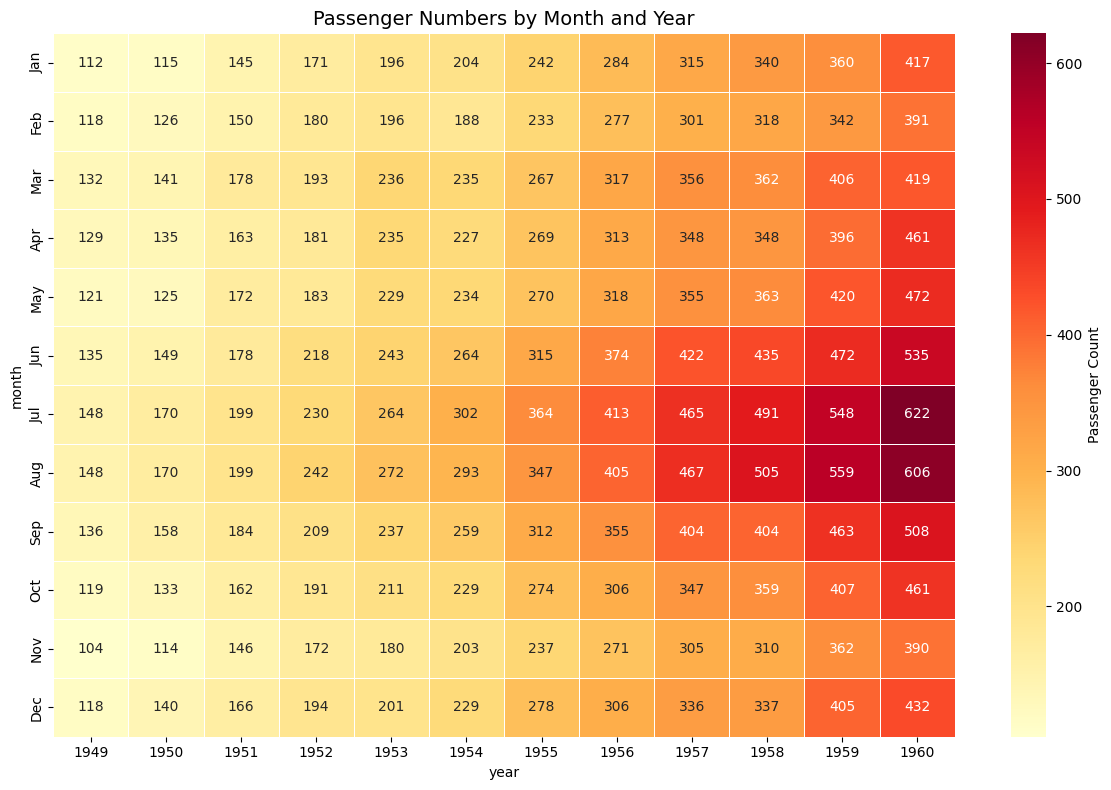

In [12]:
# Create a heatmap of passenger numbers by month and year
plt.figure(figsize=(12, 8))
sns.heatmap(
    flights_pivot, 
    annot=True,  # Show values in cells
    fmt="d",  # Format annotations as integers
    cmap="YlOrRd",  # Use the YlOrRd colormap
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"label": "Passenger Count"}  # Customize colorbar
)

plt.title("Passenger Numbers by Month and Year", fontsize=14)
plt.tight_layout()
plt.show()